In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns



In [3]:
# Der Grund, warum wir uns die Zahlen zur Bevölkerung näher betrachten, ist, um die Menge des Sperrmülls besser abschätzen zu können
# Wir gehen davon aus, dass die Menge des Sperrmülls mit der Bevölkerungszahl korreliert, da bspw. bei Umzügen besonders viel Sperrmüll anfallen könnten.
# Tode oder Geburten könnten aber auch Lebensabschnitte sein, wo man mehr Sperrmüll produziert.

In [4]:
df_bsr_data = pd.read_csv('../data/trash-amounts.csv', sep=';', dtype=str)
df_bsr_data["Tonnage"] = df_bsr_data["Tonnage"].str.replace(",",".")
df_bsr_data.dropna(inplace=True)

df_population = pd.read_csv('../data/population.csv', sep=';', dtype=str)

In [5]:
df_bsr_data.tail()


,Monat,KW,Jahr,Datum,Hof,Schicht,Tour,Tonnage,Abfallart
381656,12,52,2023,30.12.23,VMWSF,1,5508,2.90,SPM Sammlung
381657,12,52,2023,30.12.23,VMWSM,1,2101,7.86,SPM Sammlung
381658,12,52,2023,30.12.23,VMWSM,1,2102,1.81,SPM Sammlung
381659,12,52,2023,30.12.23,VMWSN,1,3301,0.35,SPM Sammlung
381660,12,52,2023,30.12.23,VMWSN,1,3302,4.13,SPM Sammlung


In [6]:
df_population = df_population.astype(int)
df_bsr_data[['Monat','KW','Jahr','Schicht','Tour']] = df_bsr_data[['Monat','KW','Jahr','Schicht','Tour']].astype(int)
df_bsr_data['Datum'] = pd.to_datetime(df_bsr_data['Datum'], format='%d.%m.%y')  
df_bsr_data['Tonnage'] = df_bsr_data['Tonnage'].astype(float)

print(df_bsr_data.dtypes)
print(df_population.dtypes)

Monat                 int64
KW                    int64
Jahr                  int64
Datum        datetime64[ns]
Hof                  object
Schicht               int64
Tour                  int64
Tonnage             float64
Abfallart            object
dtype: object
Month                               int64
Year                                int64
Population status month begin       int64
Number of relocation to Berlin      int64
Number of relocation from Berlin    int64
Relocation balance                  int64
Population status balance           int64
Population status month end         int64
living births                       int64
deaths                              int64
dtype: object


In [7]:
# Define a dictionary with the number of days for each month
days_in_month = {
    1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30,
    7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31
}

# Function to divide the last three columns by the number of days in the month
def divide_by_days(row):
    days = days_in_month[row['Month']]
    row['Number of relocation to Berlin'] /= days
    row['Number of relocation from Berlin'] /= days
    row['Relocation balance'] /= days
    row['living births'] /= days
    row['deaths'] /= days


    return row


# Apply the function to the dataframe
df_population = df_population.apply(divide_by_days, axis=1)

/var/folders/yz/c6jgyjbs1575zd0rjq04jbtr0000gn/T/ipykernel_25426/1365264836.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '470.5806451612903' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row['Number of relocation to Berlin'] /= days
/var/folders/yz/c6jgyjbs1575zd0rjq04jbtr0000gn/T/ipykernel_25426/1365264836.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '578.1428571428571' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row['Number of relocation to Berlin'] /= days
/var/folders/yz/c6jgyjbs1575zd0rjq04jbtr0000gn/T/ipykernel_25426/1365264836.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '481.06451612903226' has dtype incompatible with int64, p

In [8]:
df_population.head()

,Month,Year,Population status month begin,Number of relocation to Berlin,Number of relocation from Berlin,Relocation balance,Population status balance,Population status month end,living births,deaths
0,1.0,2019.0,3644826.0,470.580645,378.580645,92.000000,2534.0,3647360.0,87.258065,94.193548
1,2.0,2019.0,3647360.0,578.142857,430.785714,147.357143,3633.0,3650993.0,104.857143,111.142857
2,3.0,2019.0,3650993.0,481.064516,407.129032,73.935484,1892.0,3652885.0,102.419355,101.193548
3,4.0,2019.0,3652885.0,455.733333,401.200000,54.533333,1818.0,3654703.0,101.800000,91.566667
4,5.0,2019.0,3654703.0,386.612903,421.903226,-35.290323,-829.0,3653874.0,107.483871,91.580645


In [9]:
df_merged_data = pd.merge(df_bsr_data, df_population, left_on=['Monat','Jahr'],right_on=['Month','Year'], how='left')
df_merged_data = df_merged_data.drop(['Month','Year'], axis=1)
df_merged_data.head()

,Monat,KW,Jahr,Datum,Hof,Schicht,Tour,Tonnage,Abfallart,Population status month begin,Number of relocation to Berlin,Number of relocation from Berlin,Relocation balance,Population status balance,Population status month end,living births,deaths
0,1,1,2019,2019-01-02,VMF,1,1,5.59,BIO,3644826.0,470.580645,378.580645,92.0,2534.0,3647360.0,87.258065,94.193548
1,1,1,2019,2019-01-02,VMF,1,4,3.23,BIO,3644826.0,470.580645,378.580645,92.0,2534.0,3647360.0,87.258065,94.193548
2,1,1,2019,2019-01-02,VMF,1,5,5.68,BIO,3644826.0,470.580645,378.580645,92.0,2534.0,3647360.0,87.258065,94.193548
3,1,1,2019,2019-01-02,VMF,1,6,5.48,BIO,3644826.0,470.580645,378.580645,92.0,2534.0,3647360.0,87.258065,94.193548
4,1,1,2019,2019-01-02,VMF,1,7,7.84,BIO,3644826.0,470.580645,378.580645,92.0,2534.0,3647360.0,87.258065,94.193548


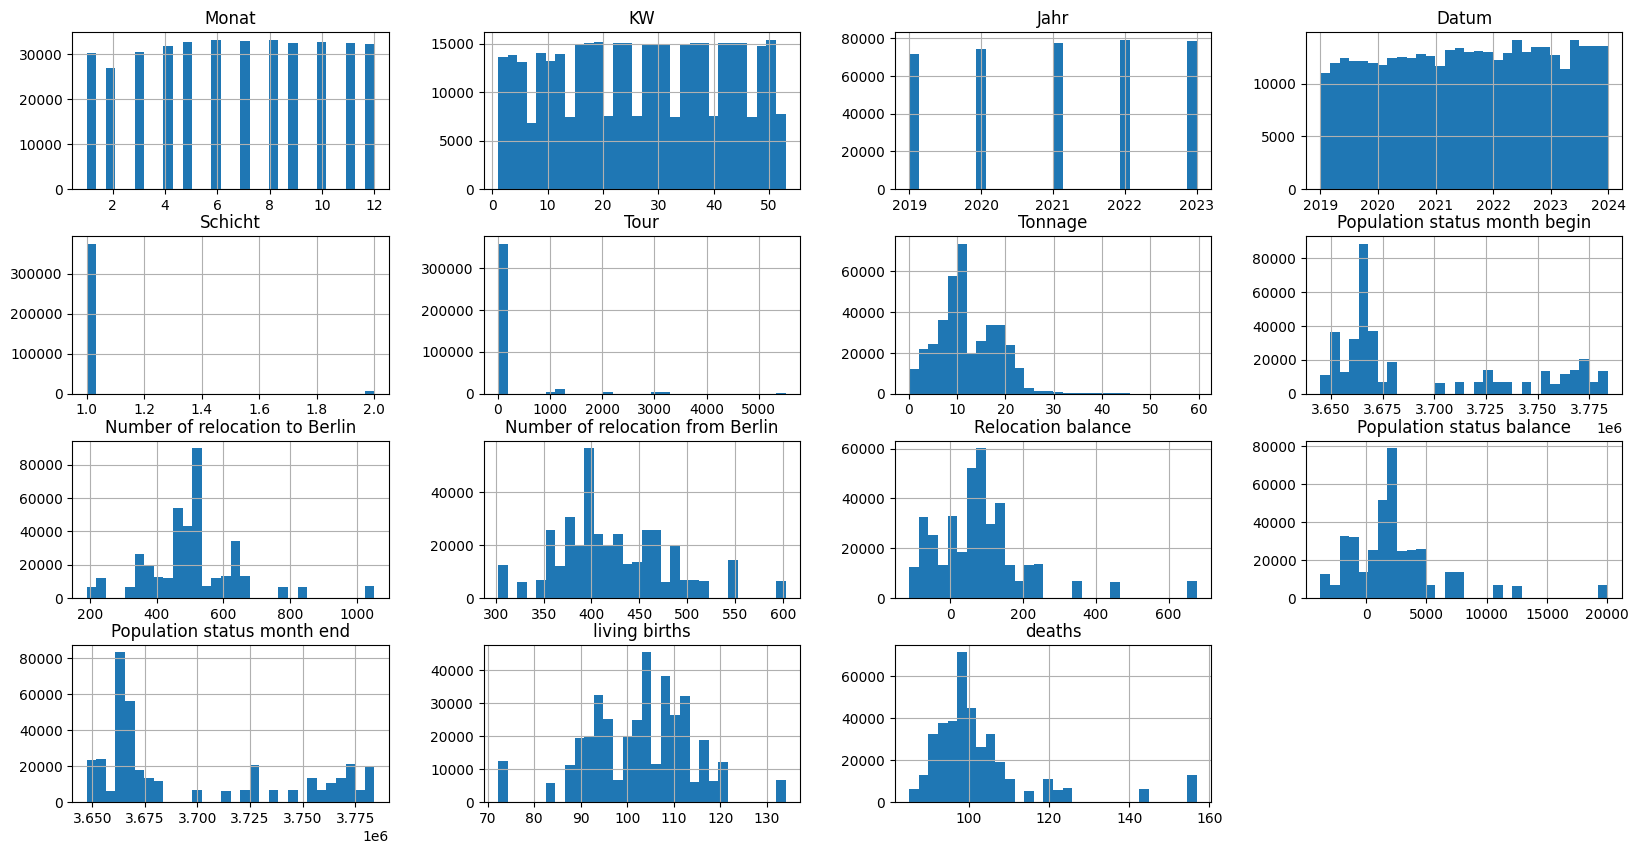

In [10]:
df_merged_data.hist(bins=30, figsize=(20, 10))
plt.show()


In [11]:
df_merged_data_encoded = pd.get_dummies(df_merged_data, columns=['Hof', 'Abfallart'])
df_merged_data_encoded.head()

,Monat,KW,Jahr,Datum,Schicht,Tour,Tonnage,Population status month begin,Number of relocation to Berlin,Number of relocation from Berlin,...,Hof_VMF,Hof_VMG,Hof_VMM,Hof_VMN,Hof_VMWSF,Hof_VMWSM,Hof_VMWSN,Abfallart_BIO,Abfallart_HM,Abfallart_SPM Sammlung
0,1,1,2019,2019-01-02,1,1,5.59,3644826.0,470.580645,378.580645,...,True,False,False,False,False,False,False,True,False,False
1,1,1,2019,2019-01-02,1,4,3.23,3644826.0,470.580645,378.580645,...,True,False,False,False,False,False,False,True,False,False
2,1,1,2019,2019-01-02,1,5,5.68,3644826.0,470.580645,378.580645,...,True,False,False,False,False,False,False,True,False,False
3,1,1,2019,2019-01-02,1,6,5.48,3644826.0,470.580645,378.580645,...,True,False,False,False,False,False,False,True,False,False
4,1,1,2019,2019-01-02,1,7,7.84,3644826.0,470.580645,378.580645,...,True,False,False,False,False,False,False,True,False,False


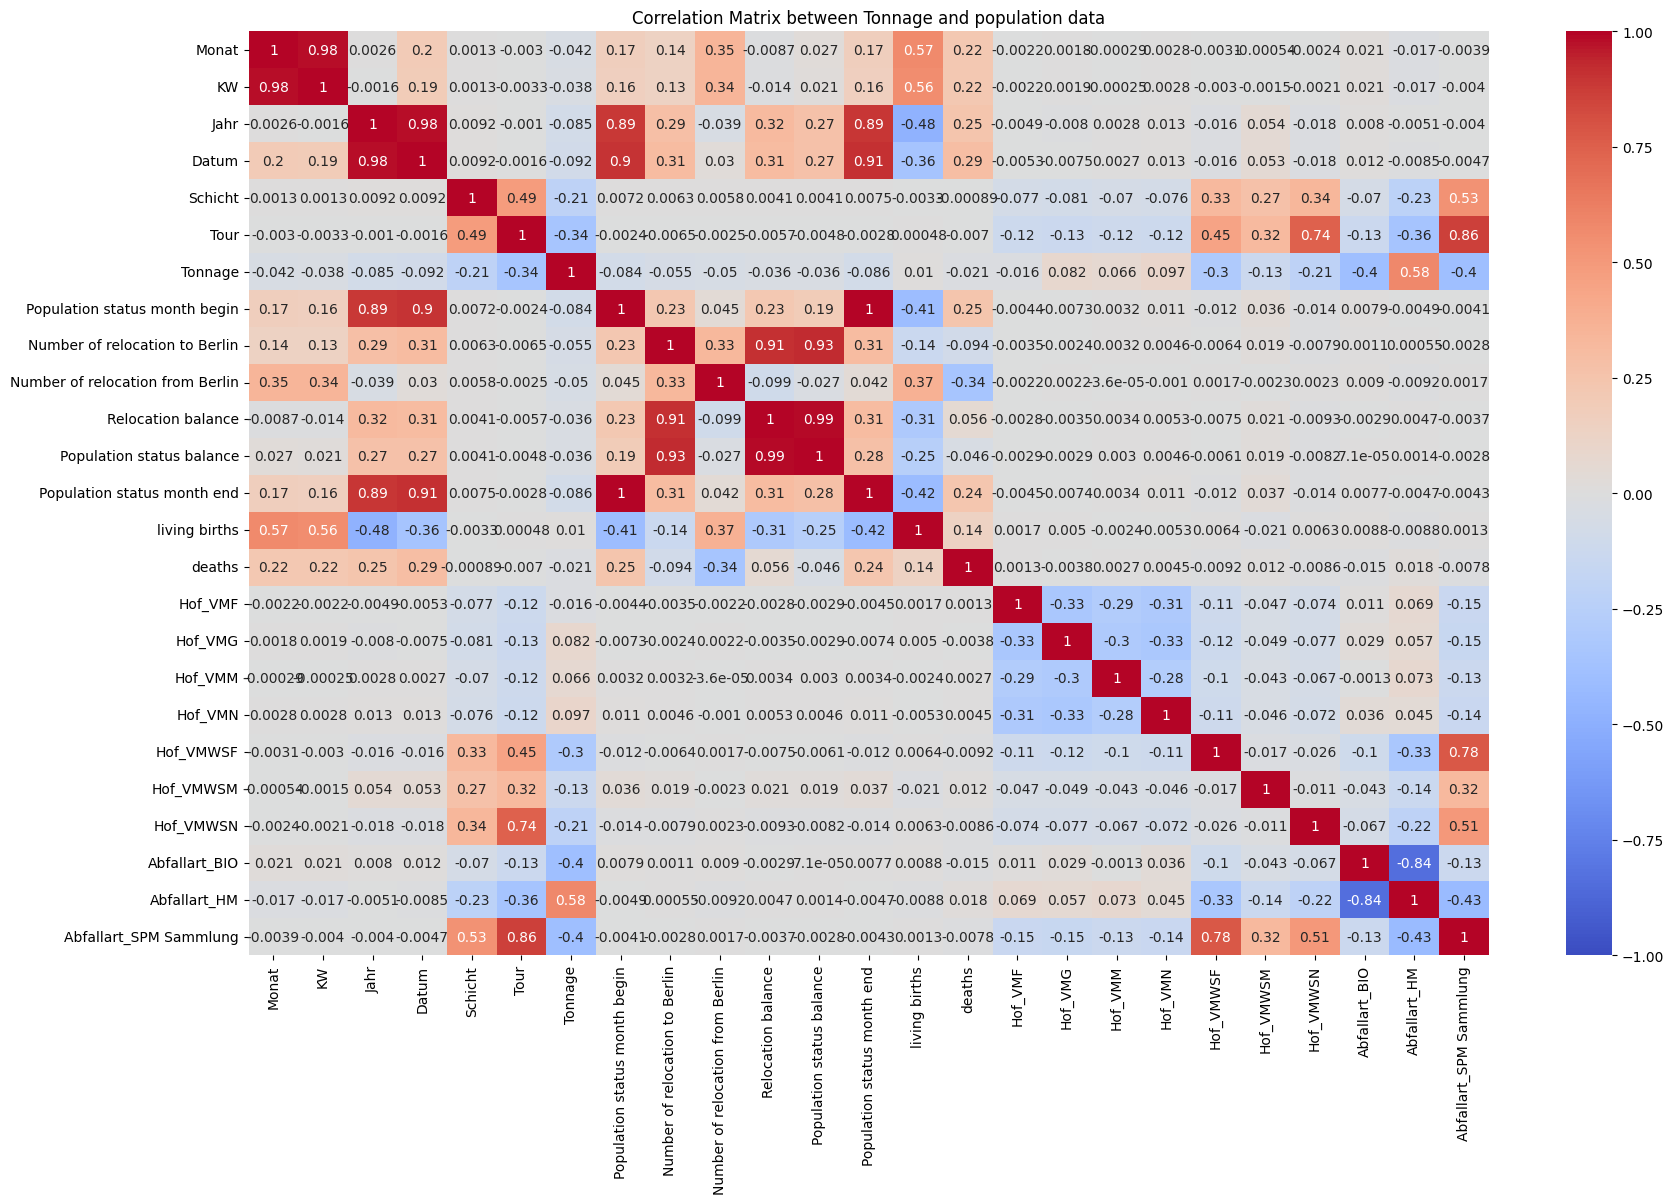

In [12]:

correlation_matrix = df_merged_data_encoded.corr()
# plot the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Tonnage and population data')
plt.show()


In [13]:
# according to the correlation matrix, the most correlated features with Tonnage are: 
# Tour, Hof_VMWSN, Abfallart_BIO, Abfallart_HM, Abfallart_SPM
